# AlexNet CNN Architecture

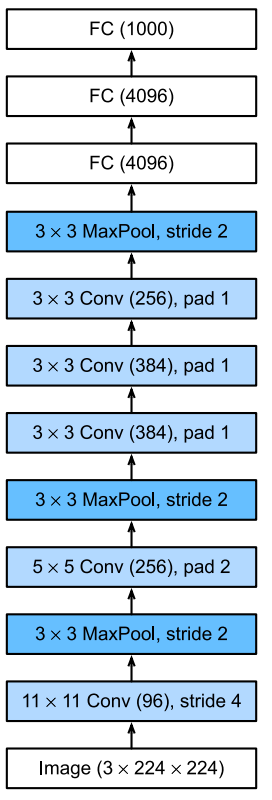

In [ ]:
import torch
from torch import nn

In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(out_channels=96, kernel_size=(11, 11), padding=1, stride=4), nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3, 3), stride=2),
            nn.LazyConv2d(out_channels=256, kernel_size=(5, 5), padding=1, stride=4), nn.ReLU(), nn.ReLU

        )